## Visualizing heavy traffic on I-94

**Introduction**

**The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows**

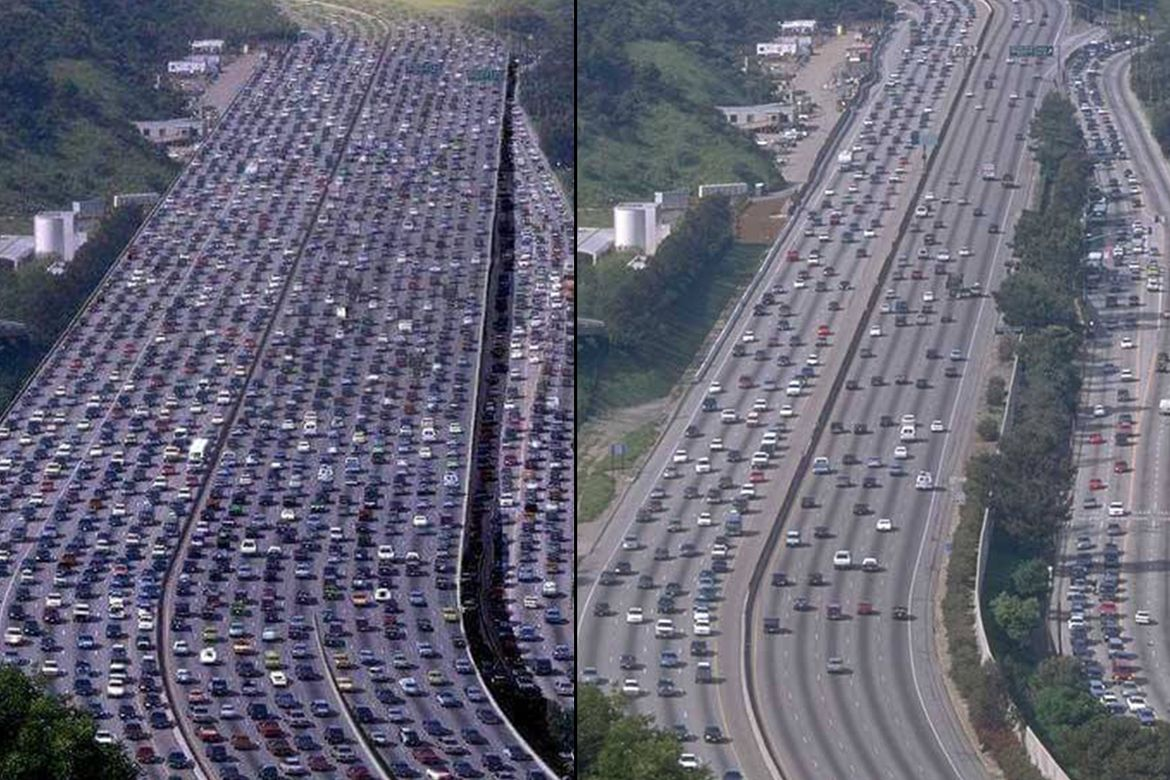

**Import necessary libraries**

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Read in dataset**

In [3]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [5]:
traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [6]:
traffic.isna().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

**First-glance Analysis**

**We have 6 columns and a little more than 48,000 rows. We are lucky because none of the columns have Nan's and that is not realistic of a dataset but my focus on this project is data visualization.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f414cb58fa0>]],
      dtype=object)

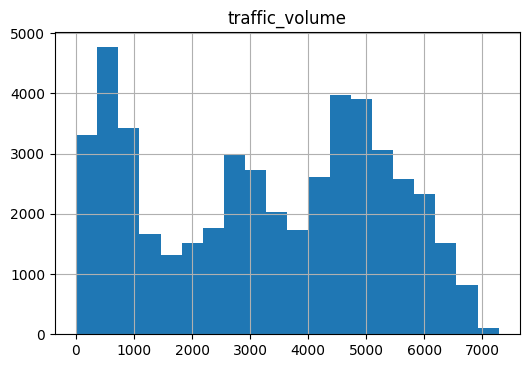

In [7]:
traffic.hist('traffic_volume', bins=20)

In [8]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

**The highest amount of traffic volume entries is for volumne around 500. In addition, the historgram is not perfectly symmetric. In fact, there are some high amount of entries at the two lowest and highest ends of the spectrum. There also seems to be lower entries where there was a medium amount of traffic volume.**

In [9]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [10]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [11]:
import datetime as dt

In [12]:
traffic['hour'] = traffic['date_time'].dt.hour

**The following code will separate the traffic volume column by aggregating by nighttime and daytime using a boolean mask.**

In [79]:
day = traffic[(traffic['hour'] >= 7) & (traffic['hour'] < 19)]
day

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13
...,...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,15
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,15
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,16
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,17


In [32]:
day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25838 entries, 0 to 48199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              25838 non-null  object        
 1   temp                 25838 non-null  float64       
 2   rain_1h              25838 non-null  float64       
 3   snow_1h              25838 non-null  float64       
 4   clouds_all           25838 non-null  int64         
 5   weather_main         25838 non-null  object        
 6   weather_description  25838 non-null  object        
 7   date_time            25838 non-null  datetime64[ns]
 8   traffic_volume       25838 non-null  int64         
 9   hour                 25838 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 2.2+ MB


In [81]:
night_time = traffic[(traffic['hour'] >= 19) | (traffic['hour'] < 7)]

In [82]:
night_time

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539,19
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784,20
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361,21
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529,22
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963,23
...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,19
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,20
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,21
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,22


**My goal in the bottom graphs was to create a side-by-side comparison of the traffic volume by day and night.**

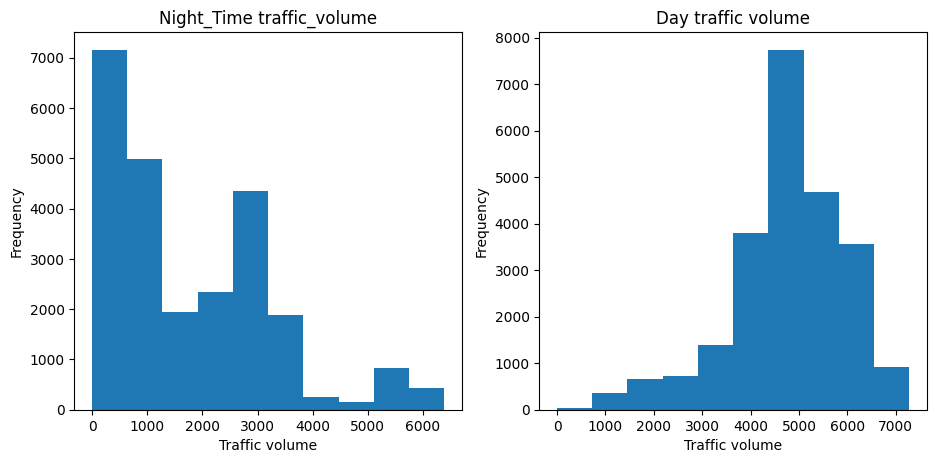

In [83]:
plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
plt.hist(night_time['traffic_volume'])
plt.title('Night_Time traffic_volume')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(day['traffic_volume'])
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.title('Day traffic volume')
plt.show()

**Night_Time traffic_volume**

**This graph shows that the data is skewed right. This would seem to indicate that the highest numbers are around the time when people are just coming home from work and then it picks up again as people are leaving to work in the early morning.**

**Day traffic volume**

**This graph has a slight skew left, indicating that the higherst amount of traffic happens during one time during the early morning traffic and then it levels off.**

**Relatively speaking, the daytime traffic data shows a huge spike and although the nighttime traffic does not ever show the same amount of volume, and so it would be best to exclude the nighttime data.**

In [86]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']
day

<ipython-input-86-c809cce4caa4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,month
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,10
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,10
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,10
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,10
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,10
...,...,...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,15,9
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,15,9
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,16,9
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,17,9


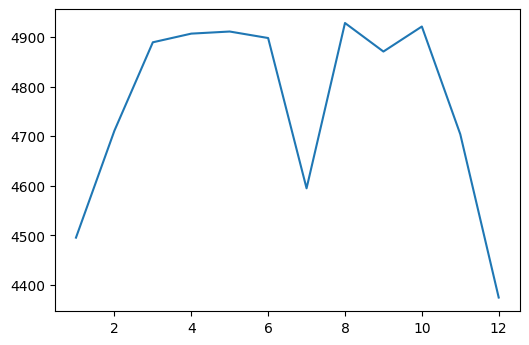

In [97]:
plt.plot(by_month['traffic_volume'])

**July has a big dropoff in daytime traffic and after November, there is a huge dropoff of traffic, likely due to the snow and heavy winter storms?**

In [98]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'] 

<ipython-input-98-1c824cf974a2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

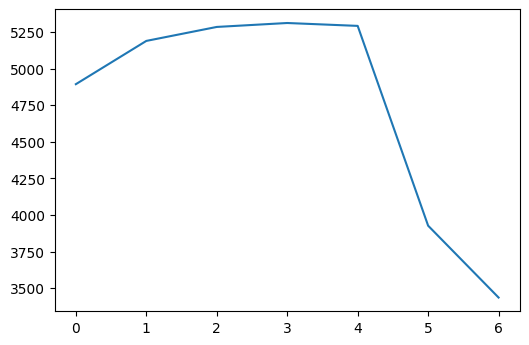

In [99]:
plt.plot(by_dayofweek['traffic_volume'])

**Saturday and Sunday are the least busy days of the week. Not surprising given the I-94 traveling west is to a major metropolitan area that likely is the seat of commerce.**

In [100]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

<ipython-input-100-ed6db927f547>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



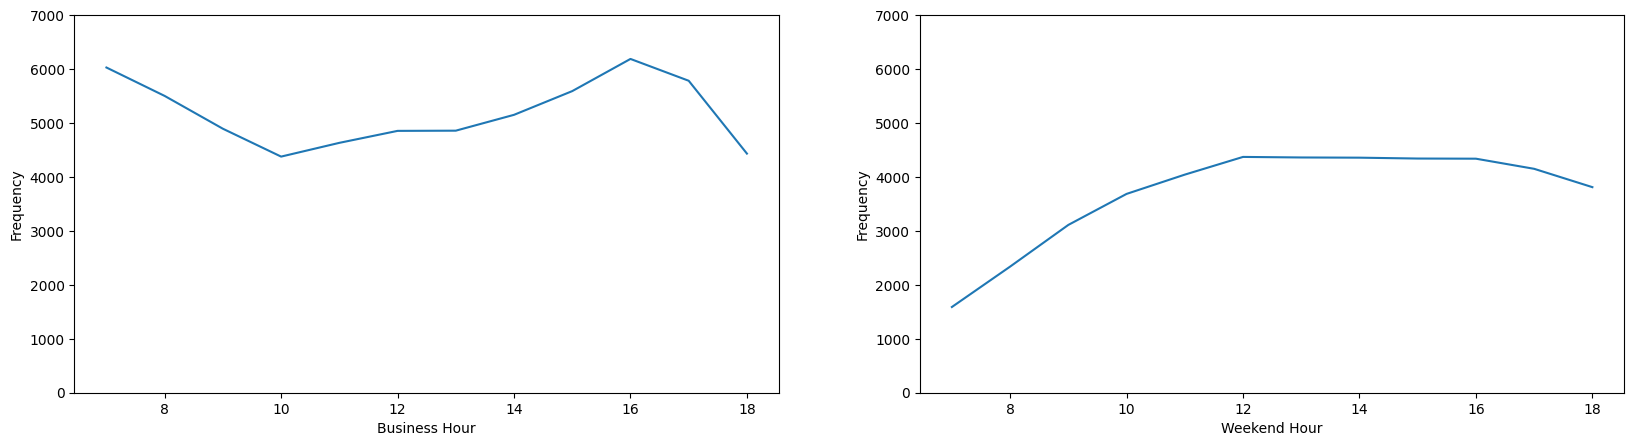

In [112]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.xlabel('Business Hour')
plt.ylabel('Frequency')
plt.ylim([0,7000])
plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.xlabel('Weekend Hour')
plt.ylabel('Frequency')
plt.ylim([0,7000])
plt.show()

In [108]:
by_hour_weekend

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek
hour,,,,,,,
7,278.095331,0.291540,0.000000,50.006623,1589.365894,6.518212,5.501656
8,277.981017,0.083870,0.000083,48.877076,2338.578073,6.523256,5.503322
9,279.785660,0.075234,0.000364,49.688042,3111.623917,6.603120,5.492201
10,280.403811,0.079674,0.000103,48.915808,3686.632302,6.491409,5.503436
11,282.129355,0.141387,0.000000,52.372973,4044.154955,6.482883,5.491892
12,282.936119,0.095784,0.000000,51.418018,4372.482883,6.500901,5.493694
13,283.784951,0.180452,0.000000,53.095841,4362.296564,6.580470,5.497288
14,284.663261,0.087847,0.000000,52.735401,4358.543796,6.644161,5.500000
15,284.854578,0.074771,0.000000,52.148624,4342.456881,6.612844,5.506422


**Judging from the graphs, the business day rush hour starts at 7 and again at 5. Whereas the weekend busy times are pretty consistent except for the 7:00 a.m. - 10:00 a.m. hour where there is a lot less traffic.**

In [115]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
hour              0.172704
month            -0.022337
dayofweek        -0.416453
Name: traffic_volume, dtype: float64

**The temp column and clouds_all column have the highest negative and positive correlation to the traffic_volume.**

In [116]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

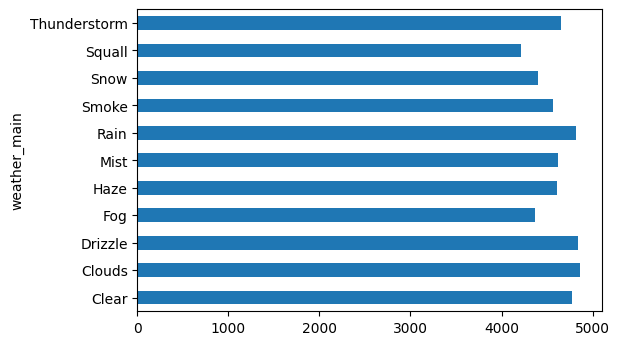

In [123]:
by_weather_main['traffic_volume'].plot.barh()

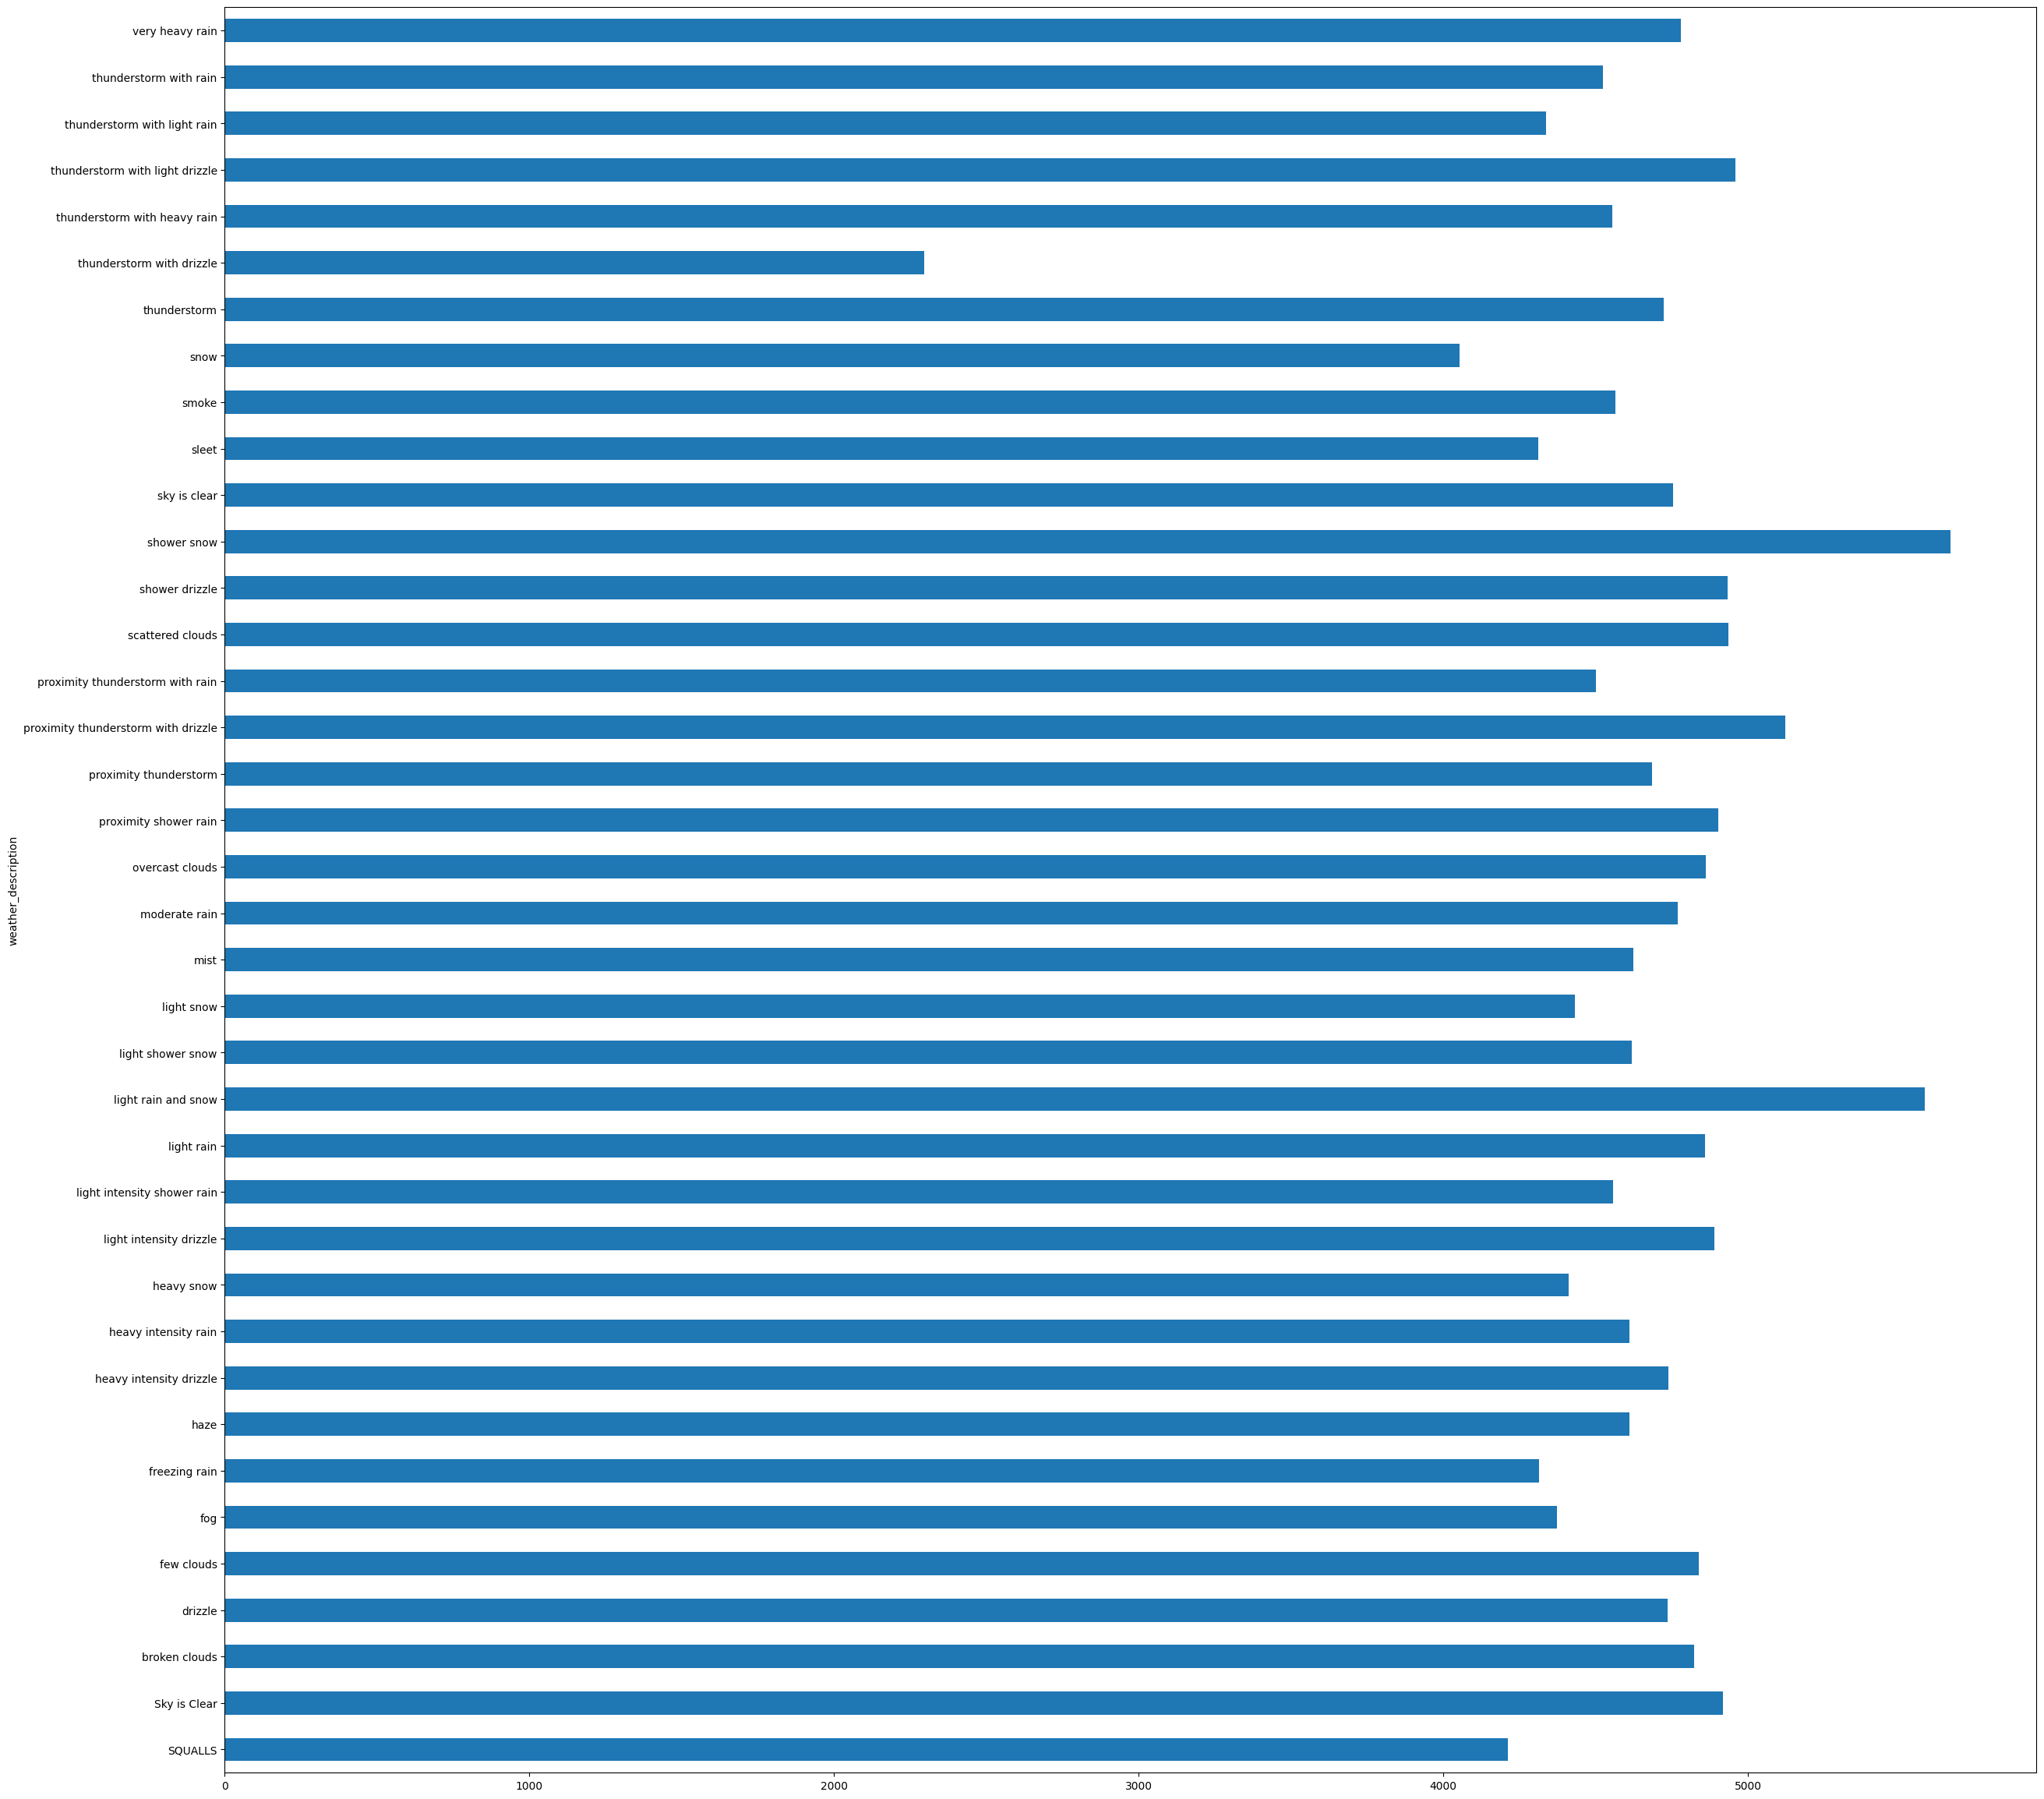

In [126]:
plt.figure(figsize=(30,30))
by_weather_description['traffic_volume'].plot.barh()

**Conclusion**

**We have managed to narrow down 1-94's biggest contributions to heavy traffic. The first is that daytime has heavier traffic than at night. Second, during the business week there is also more traffic than the weekend. Lastly, light rain and shower snow will also cause a large surge in traffic.**